# Multi-Objective Linear Optimization (MOLO/MOLP)
  
A Multi-objective linear optimization problem is a linear optimization problem with more than just one objective function. This area of linear programming is also referred to as multi-objective linear programming (MOLP) or multi-goal linear programming.
  
Below I stated an examplaric multi-objective linear optimization problem with two objective functions: 
  
\begin{equation*}
\begin{aligned}
& \underset{x_1, x_2}{\text{maximize}}
& & 2x_1+3x_2 \\
& \underset{x_1, x_2}{\text{maximize}}
& & 4x_1-2x_2 \\
& \text{subject to} \\
& & x_1+x_2 \leq 10 \\
& & 2x_1+x_2 \leq 15 \\
& & x_1,x_2 \geq 0 \\
& & x_1,x_2 \in \R
\end{aligned}
\end{equation*}
  
Assuming that in above problem statement the two objective functions represent two different goals, such as e.g. service level and profit margin of some product portfolio, I test two alternative approaches for solving this problem.

The first approach will be to solve for one of the objectives, then fix the problem at the optimal outcome of that first problem by adding an additional constraint to a second optimization run where I will then maximize the second objective function (subject to the constraint of keeping the optimal objective value to the first sub-problem).

The second approach will be to add the two objectives together, i.e. to merge them into one objective function by applying weights. By sampling the weights and solving the combined problem for each sampled weight the optimal outcome can be reviewed in dependency of the weights.

## Approach 1: Maximizing for one objective, then adding it as a constraint and solving for the other objective
  
Using PuLP I maximize the first objective first, then I add that objective function as a constraint to the original problem and maximize the second objective subject to all constraints, including that additional constraint.
  
In mathematical syntax, the problem we solve first can be stated as follows:
  
\begin{equation*}
\begin{aligned}
& \underset{x_1, x_2}{\text{maximize}}
& & 2x_1+3x_2 \\
& \text{subject to} \\
& & x_1+x_2 \leq 10 \\
& & 2x_1+x_2 \leq 15 \\
& & x_1,x_2 \geq 0 \\
& & x_1,x_2 \in \R
\end{aligned}
\end{equation*}

In [1]:
# First import PulP
import pulp

# Initialize problem
linearProblem = pulp.LpProblem("Maximizing_for_first_objective", pulp.LpMaximize)

# Initialize variables
x1 = pulp.LpVariable('x1', lowBound=0)
x2 = pulp.LpVariable('x2', lowBound=0)

# Adding first objective function to the linear problem
linearProblem += 2*x1 +3*x2

# Add the constraints to the problem
linearProblem += x1 + x2 <= 10
linearProblem += 2*x1 + x2 <= 15

# Solve with default solver, maximizing the first objective
solution = linearProblem.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/pf/_zjf_55d7mgb5llg516d7fyc0000gn/T/ced79f7cdce44fe5acdb65e7db3ca7f4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/pf/_zjf_55d7mgb5llg516d7fyc0000gn/T/ced79f7cdce44fe5acdb65e7db3ca7f4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 4.9999998 (2)
0  Obj -0 Dual inf 4.9999998 (2)
1  Obj 30
Optimal - objective value 30
Optimal objective 30 - 1 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       

In [2]:
# output information if optimum was found, what the maximal objective value is and what the optimal point is
print(str(pulp.LpStatus[solution])+" ; max value = "+str(pulp.value(linearProblem.objective))+
      " ; x1_opt = "+str(pulp.value(x1))+
      " ; x2_opt = "+str(pulp.value(x2)))

Optimal ; max value = 30.0 ; x1_opt = 0.0 ; x2_opt = 10.0


Now, I re-state the original problem such that the second objective function is maximized subject to an additional constraint. That additional constraint requests that the first objective must be at least 30. Using mathematical syntax the problem I now solve can be stated as follows:
  
\begin{equation*}
\begin{aligned}
& \underset{x_1, x_2}{\text{maximize}}
& & 4x_1+2x_2 \\
& \text{subject to} \\
& & x_1+x_2 \leq 10 \\
& & 2x_1+x_2 \leq 15 \\
& & 2x_1+3x_2 \geq 30 \\
& & x_1,x_2 \geq 0 \\
& & x_1,x_2 \in \R
\end{aligned}
\end{equation*}
  
Here is the implementation of above problem statement in Python, using PuLP:

In [3]:
# re-initialize the problem statement
linearProblem = pulp.LpProblem("Maximize_second_objective",pulp.LpMaximize)
linearProblem += 4*x1 - 2*x2

# Adding constraints
linearProblem += x1 + x2 <= 10
linearProblem += 2*x1 + x2 <= 15
linearProblem += 2*x1 + 3*x2 >= 30  # first problems solution is now a constraint

# Review problem statement after remodelling
linearProblem

Maximize_second_objective:
MAXIMIZE
4*x1 + -2*x2 + 0
SUBJECT TO
_C1: x1 + x2 <= 10

_C2: 2 x1 + x2 <= 15

_C3: 2 x1 + 3 x2 >= 30

VARIABLES
x1 Continuous
x2 Continuous

In [4]:
# Solve with default solver, maximizing the second objective
solution = linearProblem.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/pf/_zjf_55d7mgb5llg516d7fyc0000gn/T/4391810b20184c3cacb8e2e498ec2824-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/pf/_zjf_55d7mgb5llg516d7fyc0000gn/T/4391810b20184c3cacb8e2e498ec2824-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 17 RHS
At line 21 BOUNDS
At line 22 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj -0 Primal inf 9.9999999 (1) Dual inf 3.9999999 (1)
0  Obj -0 Primal inf 9.9999999 (1) Dual inf 1.6666667e+10 (2)
2  Obj -20
Optimal - objective value -20
Optimal objective -20 - 2 iterations time 0.002
Option for printingOptions ch

In [5]:
# output a string summarizing whether optimum was found, and if so what the optimal solution 
print(str(pulp.LpStatus[solution])+" ; max value = "+str(pulp.value(linearProblem.objective))+
      " ; x1_opt = "+str(pulp.value(x1))+
      " ; x2_opt = "+str(pulp.value(x2)))

Optimal ; max value = -19.999999999995993 ; x1_opt = 1.0018653e-12 ; x2_opt = 10.0


This approach suggests that x1 = 0 and x2 = 10 is the the optimal solution. The optimal objective values would be 30 for objective one, and -20 for objective two.

## Approach 2: Combine objectives, using sampled weights and iterations with defined step-size

When applying this approach, we will restate the original problem as follows:
  
\begin{equation*}
\begin{aligned}
& \underset{x_1, x_2}{\text{maximize}}
& & \alpha(2x_1+3x_2) + (1-\alpha)(4x_1-2x_2) \\
& \text{subject to} \\
& & x_1+x_2 \leq 10 \\
& & 2x_1+x_2 \leq 15 \\
& & x_1,x_2 \geq 0 \\
& & x_1,x_2 \in \R \\
& & \alpha \in [0;1]
\end{aligned}
\end{equation*}

The question now is how to choose alpha ($\alpha$)?
  
A typical approach in a situation like this is to identify an efficient frontier. In economics this is e.g. known as “pareto optimality”. To construct such an approach I sample alpha in steps of 0.01. For each value of alpha I restate the problem, using PuLP – and solve it.

I store my results in a list and visualize the outcome using `matplotlib.pyplot`:

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/pf/_zjf_55d7mgb5llg516d7fyc0000gn/T/3af1b67e51be4fb1b1d3ef1abe734105-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/pf/_zjf_55d7mgb5llg516d7fyc0000gn/T/3af1b67e51be4fb1b1d3ef1abe734105-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-2) rows, 0 (-2) columns and 0 (-4) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 30
After Postsolve, objective 30, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 30 - 0 iterations time 0.002, Presolve 0.00
Option for printingOp

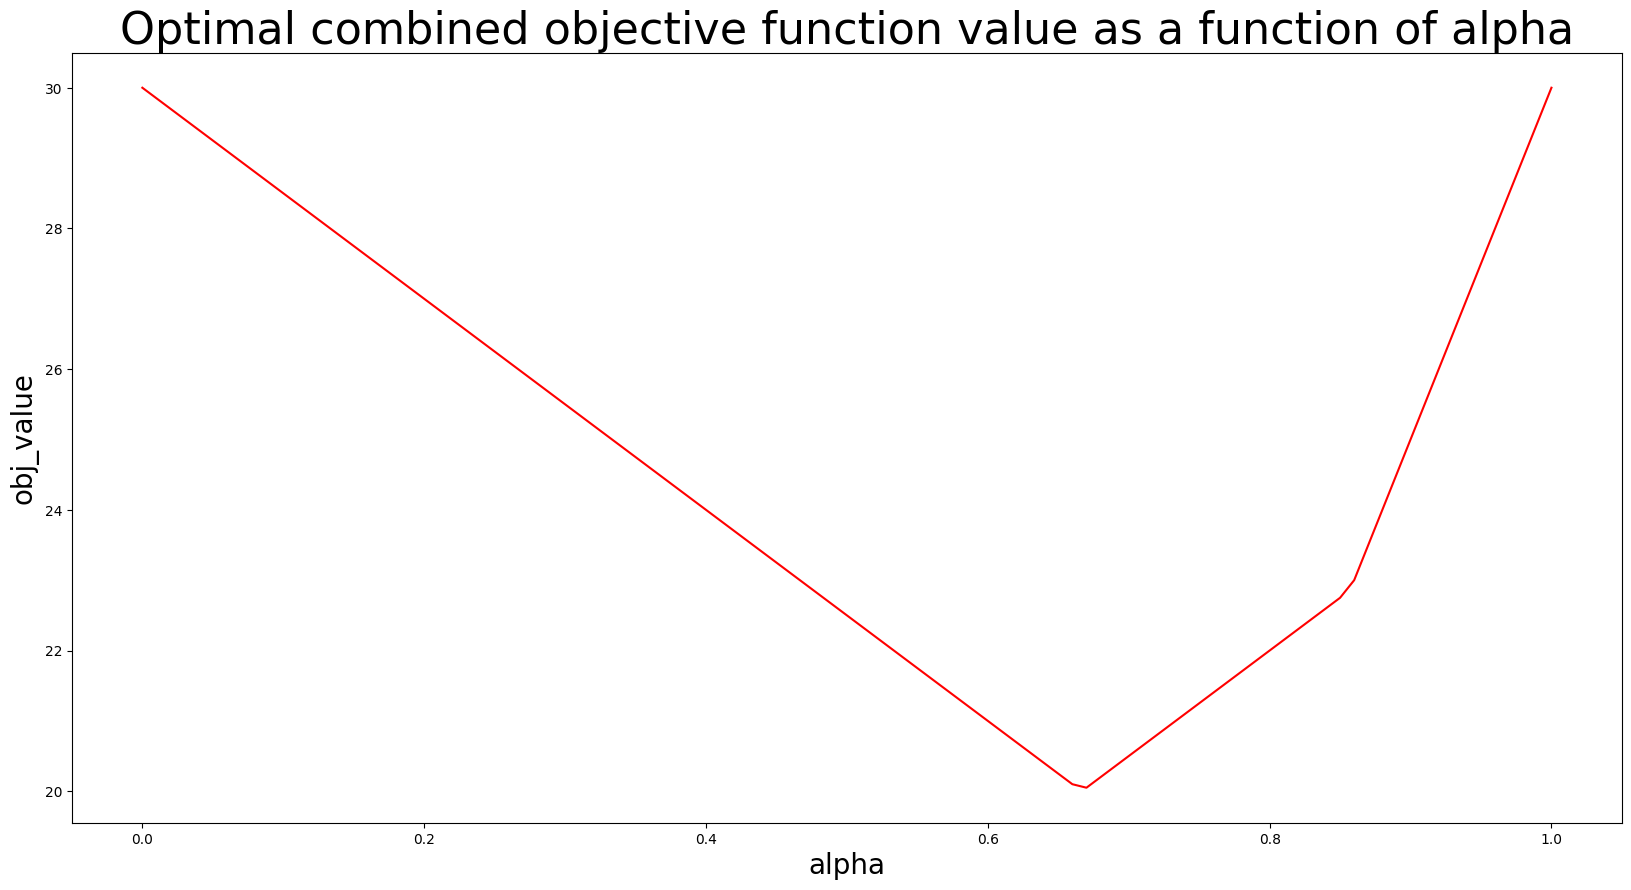

In [6]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt 

# Import pandas and numpy for being able to store data in DataFrame format
import numpy as np
import pandas as pd

# Define step-size
stepSize = 0.01

# Initialize empty DataFrame for storing optimization outcomes
solutionTable = pd.DataFrame(columns=["alpha","x1_opt","x2_opt","obj_value"])

# Iterate through alpha values from 0 to 1 with stepSize, and write PuLP solutions into solutionTable
for i in range(0,101,int(stepSize*100)):
        # declare the problem again
        linearProblem = pulp.LpProblem("Multi_objective_linear_maximization",pulp.LpMaximize)
        # Add the objective function at sampled alpha
        linearProblem += (i/100)*(2*x1+3*x2)+(1-i/100)*(4*x1-2*x2)
        # Add the constraints
        linearProblem += x1 + x2 <= 10
        linearProblem += 2*x1 + x2 <= 15
        # Solve the problem 
        solution = linearProblem.solve()
        # Write solutions into DataFrame
        solutionTable.loc[int(i/(stepSize*100))] = [i/100,
                                                     pulp.value(x1),
                                                     pulp.value(x2),
                                                     pulp.value(linearProblem.objective)]

# Visualize optimization outcome, using matplotlib.pyplot
# -- set figure size
plt.figure(figsize=(20,10))
# -- create line plot
plt.plot(solutionTable["alpha"],solutionTable["obj_value"],color="red")
# -- add axis labels
plt.xlabel("alpha",size=20)
plt.ylabel("obj_value",size=20)
# -- add plot title
plt.title("Optimal combined objective function value as a function of alpha",size=32)
# -- show plot
plt.show()